In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

In [2]:
df1 = pd.read_csv("Boston_Train.csv")
df2 = pd.read_csv("Boston_Test.csv")

In [3]:
df = pd.concat([df1,df2])

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
151,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
152,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
153,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 154
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


In [7]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

In [9]:
df.isna().sum()/len((df)*100)   # To find the missing percentage

crim       0.0
zn         0.0
indus      0.0
chas       0.0
nox        0.0
rm         0.0
age        0.0
dis        0.0
rad        0.0
tax        0.0
ptratio    0.0
black      0.0
lstat      0.0
medv       0.0
dtype: float64

In [10]:
X = df[['crim','zn','indus','nox','rm','age','dis','tax','ptratio','black','lstat']].values
y = df['medv'].values

In [11]:
X

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [12]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

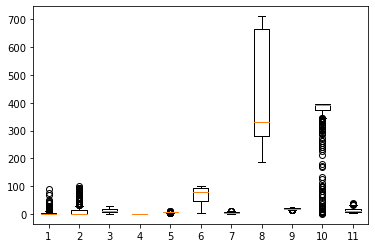

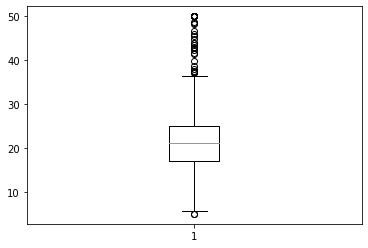

In [13]:
plt.boxplot(X)
plt.show()
plt.boxplot(y)
plt.show()

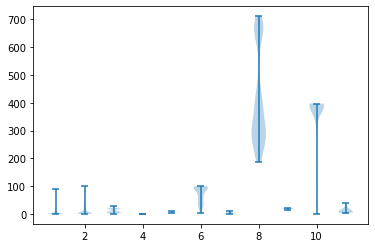

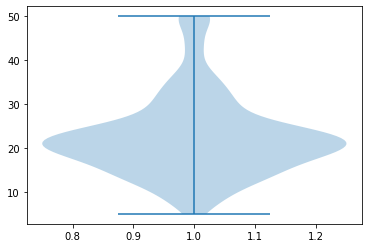

In [14]:
plt.violinplot(X)
plt.show()
plt.violinplot(y)
plt.show()

In [15]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


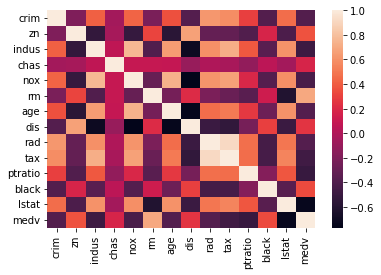

In [16]:
sns.heatmap(df.corr())
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()
model = model.fit(X_train,y_train)

In [21]:
model.coef_

array([-5.92377414e-02,  4.42006797e-02, -2.37896363e-02, -1.02379576e+01,
        3.70537675e+00, -6.86463935e-03, -1.42709060e+00, -5.30197082e-04,
       -9.59567351e-01,  1.16037292e-02, -5.55383759e-01])

In [22]:
model.intercept_

31.670735241419628

In [23]:
y_pred= model.predict(X_test)

In [24]:
y_pred

array([14.39646045, 19.39252081, 17.8753617 , 29.26230411, 29.93542969,
       17.05359166, 22.12209584, 23.13263518, 24.77556745, 22.55024673,
       35.59797091, 17.2754346 , 26.77725864, 19.33438679, 27.92882213,
       38.7317308 , 22.76693345, 20.28761873, 11.03880951, 15.80291436,
       21.49595115, 31.39782414, 19.76930201, 17.95452049, 17.01734874,
       23.48700227, 19.74617521,  7.74906393, 21.44143404, 20.8812265 ,
       28.29778947, 20.59534573,  7.82414272, 23.670789  , 12.67993095,
       31.61166552, 38.60278777, 19.3118391 , 20.41067652, 17.11144404,
        5.11804808, 11.69801738, 40.74608337, 33.32450524, 14.04847548,
       30.04046393, 13.75861638, 17.59819948, 24.81720736,  9.8359352 ,
       23.46049411, 18.42139791, 19.9693811 , 20.82306326, 18.43932496,
       28.18784916, 12.00705109, 31.11716752, 15.30197793, 28.51255556,
       17.20059283, 24.30634676, 18.90941033, 32.56314304, 26.7637753 ,
       21.63679257, 28.11885283, 26.59693108, 25.6237243 , 28.70

In [25]:
# model.predict([[0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98]])

In [26]:
X_test

array([[2.37934e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        1.72910e+02, 2.78000e+01],
       [2.83920e-01, 0.00000e+00, 7.38000e+00, ..., 1.96000e+01,
        3.91130e+02, 1.17400e+01],
       [9.96654e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.86730e+02, 1.88500e+01],
       ...,
       [1.36781e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        6.89500e+01, 3.40200e+01],
       [3.44500e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.93770e+02, 7.43000e+00],
       [7.85700e-01, 2.00000e+01, 3.97000e+00, ..., 1.30000e+01,
        3.84070e+02, 1.47900e+01]])

In [27]:
y_test

array([13.8, 18.5, 15.4, 22.8, 22.5, 16. , 21.8, 20.9, 19.4, 20.7, 50. ,
       19.9, 25.1, 20.5, 22.3, 42.3, 17. , 20. , 13.4, 17.6, 21.7, 29.4,
       13.1, 17.5, 17.8, 22.9, 17.7,  8.8, 19.6, 20.1, 26.6, 19.4,  8.7,
       20.6, 19. , 32.7, 50. , 19.5, 20.6, 17.1, 13.8, 12.7, 50. , 32.4,
       14.9, 42.8, 20. , 20.8, 22.4, 23.1, 19.3, 13.6, 18.2, 15.3, 20.6,
       24.4, 17.2, 31.5, 11.7, 22.9, 14.1, 21.7, 18.6, 32.2, 22. , 25. ,
       23.3, 18.5, 19.1, 26.4, 25. , 21.5, 19.5, 14.1, 22.1, 11.3, 23.3,
       23.8, 50. , 16.6, 23.5, 31.1, 19.3, 23.6, 23.2, 22.6, 23.9, 17.5,
       15.6, 13.4, 15.4, 19.8,  5. , 21.7, 21.8, 19.1, 24.5, 24. , 23.1,
       19.5, 24.7, 15.2, 16.1, 15.2, 36.2, 25. , 24.7, 21.2, 13.5, 28. ,
       31.7, 31.6, 41.3, 23.7, 43.1, 37.3, 28.7, 13.2, 18.4, 14.9, 14.3,
       20.3, 20.1, 22.8, 50. ,  5.6, 41.7, 15.6, 36.1, 18.9, 22.9, 14.5,
       18.9, 19.6, 21.4, 17.8, 33.1, 17.4, 14.3, 21.7, 33.1, 18.1,  7.5,
       13.1, 17.9, 18.3, 24.2, 26.4, 19.9,  8.4, 24

In [28]:
print(X.shape)
print(y.shape)

(506, 11)
(506,)


In [29]:
from sklearn.metrics import r2_score

In [30]:
r2_score(y_test,y_pred)

0.7128843397486639

In [31]:
from sklearn.metrics import mean_absolute_error

In [32]:
mean_absolute_error(y_test, y_pred)

3.2338474129329633

In [33]:
from math import sqrt
sqrt(mean_absolute_error(y_test, y_pred))

1.7982901359160495

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(y_test, y_pred)

21.63717931670369

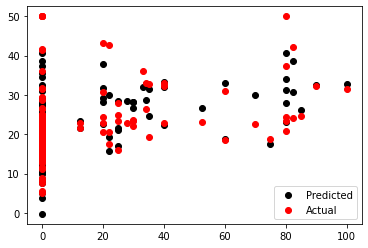

In [36]:
plt.scatter(X_test[:, 1],y_pred,color="black",label="Predicted")
plt.scatter(X_test[:, 1],y_test,color="red",label="Actual")
plt.legend()
plt.show()